In [1]:
from GWpyxel.pyxel import Pyxel

/home/maxime.fays/.conda/envs/GWpyxel-O4a/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


lal.MSUN_SI != Msun
setting __package__ to gwsurrogate.new so relative imports work
__name__ = gwsurrogate.new.spline_evaluation
__package__= gwsurrogate.new
setting __package__ to gwsurrogate.new so relative imports work
setting __package__ to gwsurrogate.new so relative imports work


In [4]:
%env GWDATAFIND_SERVER=https://datafind.igwn.org

env: GWDATAFIND_SERVER=https://datafind.igwn.org


In [5]:
!htgettoken --audience ANY  --scope gwdatafind.read,read:/ligo,read:/virgo,read:/shared,gwdatafind.read,gracedb.read,dqsegdb.read --vaultserver vault.ligo.org --issuer igwn


Attempting to get token from https://vault.ligo.org:8200 ... succeeded
Storing bearer token in /tmp/bt_u43393


In [8]:
# instantiate a Pyxel() object, then fetch some data,
# You can use source='GWOSC' for open-access data
pyxel = Pyxel()

pyxel.fetch_data('H1',1371256718,source='LIGO',cache=True)
pyxel.fetch_data('L1',1371257718,source='LIGO',cache=True)

In [9]:
# This inject a chirp into the data
duration = 400
f0 = 2000
f1 = 1000
f_ev = 'logarithmic'
hrss = 5e-22
pyxel.inject_waveform(f'chirp~{duration}~{f0}~{f1}~{f_ev}~0.4', delay=100,
                        hrss=hrss)

In [10]:
# Here we perform a prewhitening steps, compute the coherence of the two datatreams (cross-corelation),
# then normalize the resulting spectrogram

pyxel.prewhitening()
pyxel.compute_coherence(pyxel.data.H1.value,pyxel.data.L1.value)
pyxel.postwhitening()



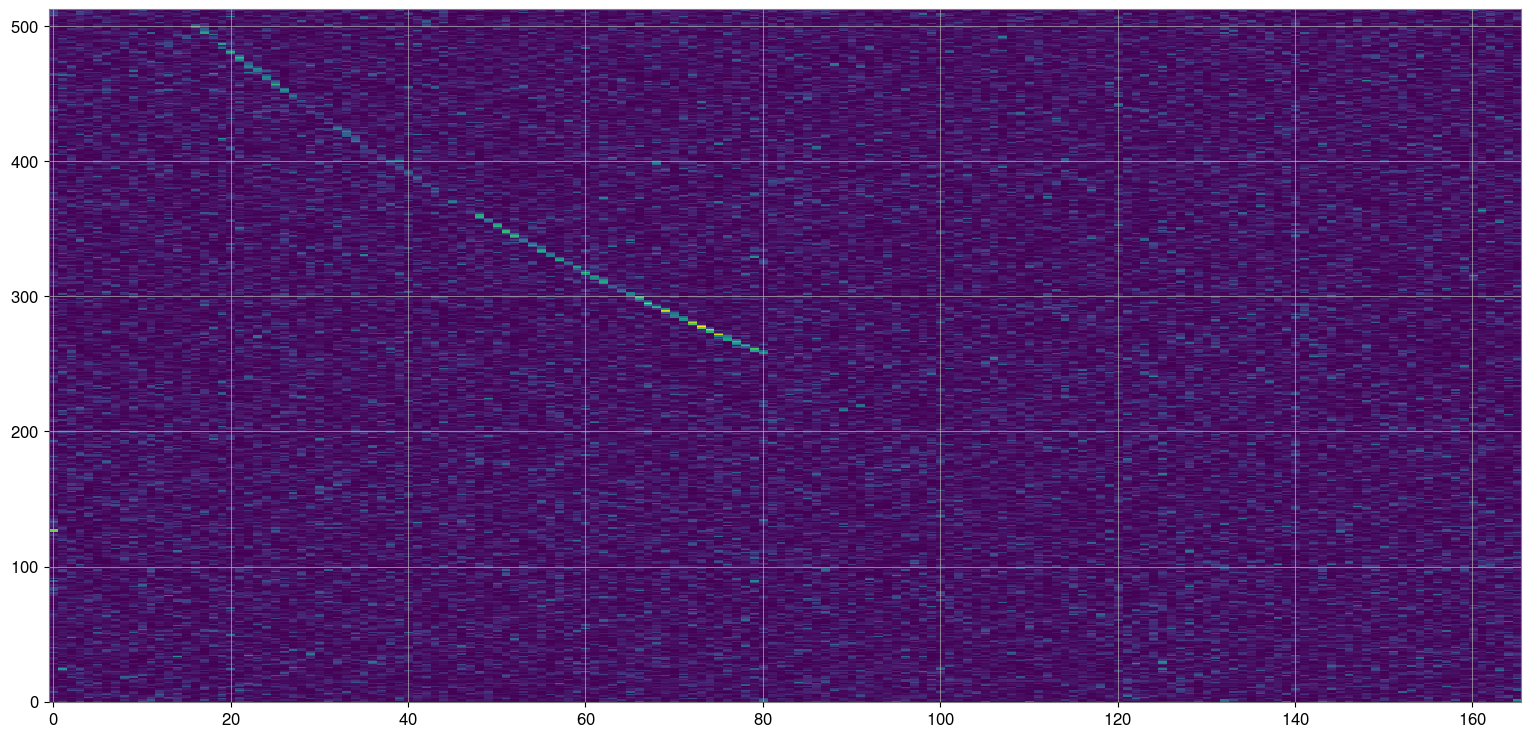

In [11]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(19,9))
plt.imshow(pyxel.spectrogram.value.T, aspect='auto', origin='lower', interpolation='none')
#plt.colorbar()
plt.show();

/home/maxime.fays/gwpyxel/GWpyxel/processing/find_candidates.py:90: RuntimeWarning: invalid value encountered in divide
  tmp = np.divide(self.TFmap[label_mask],self.Glitch[label_mask])


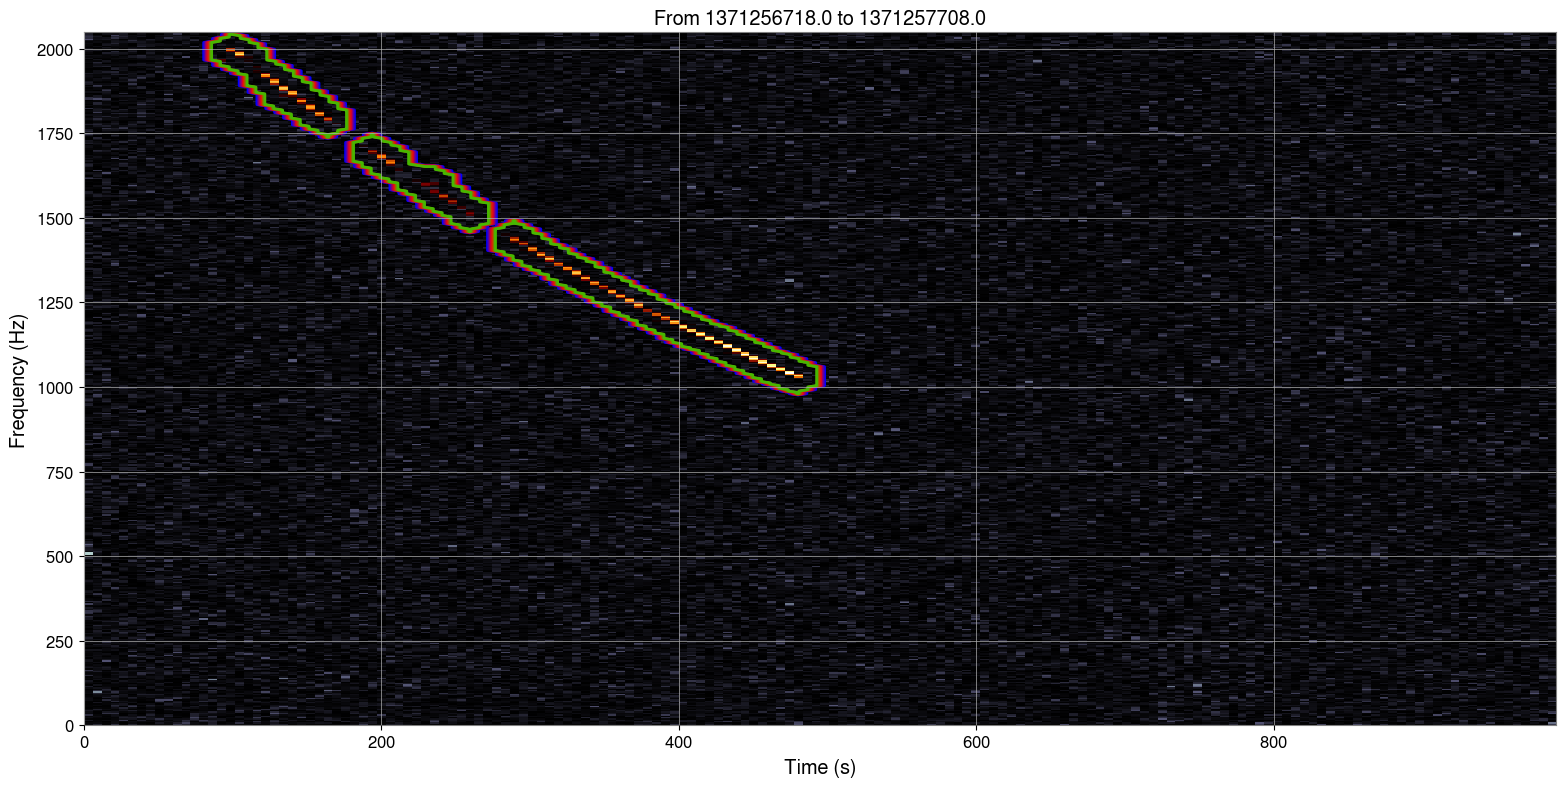

In [12]:
# Finally, we pass the spectrogram to ALBUS, then extract clusters containing potential candidates
pyxel.run_albus()
pyxel.find_candidates()
pyxel.plot()

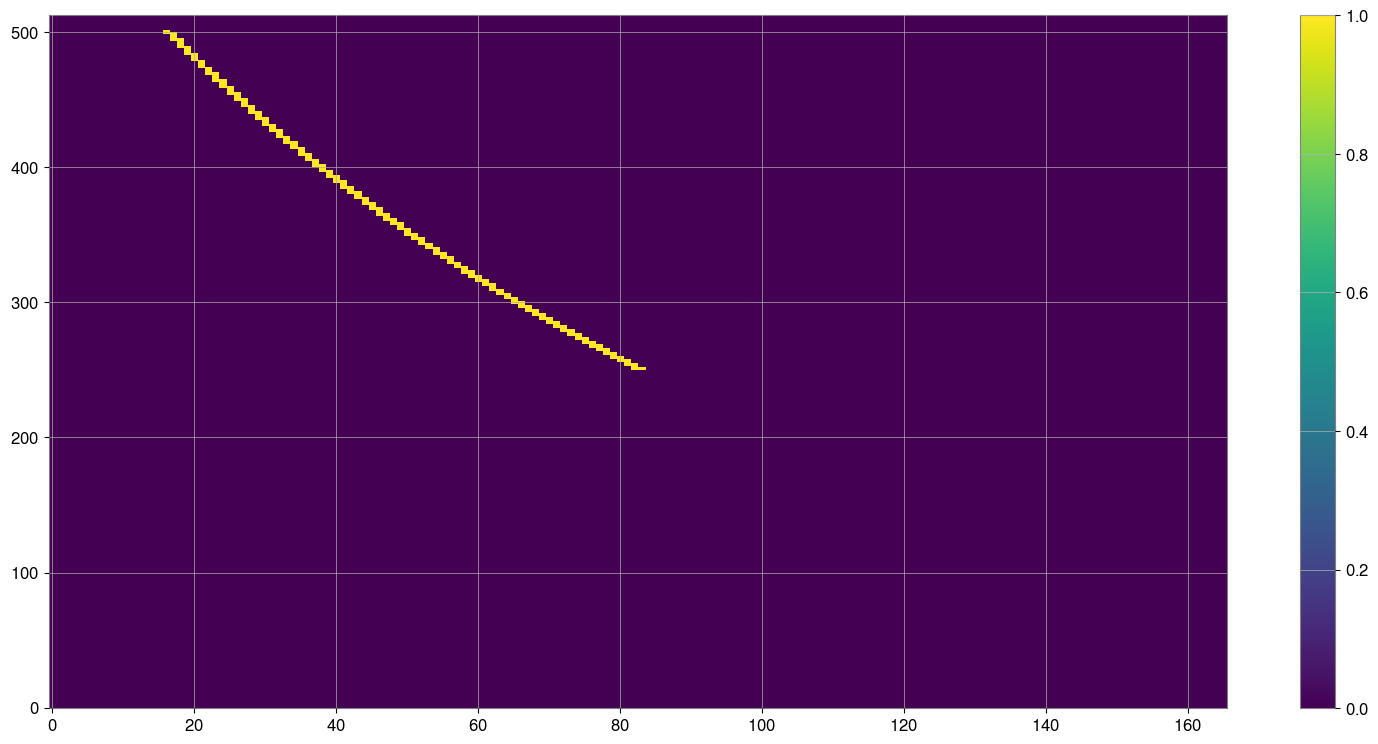

In [13]:
import numpy as np
plt.subplots(figsize=(19,9))
plt.imshow(pyxel.simulation.mask_spectrogram.T, aspect='auto', origin='lower', interpolation='none')
plt.colorbar()
plt.show();

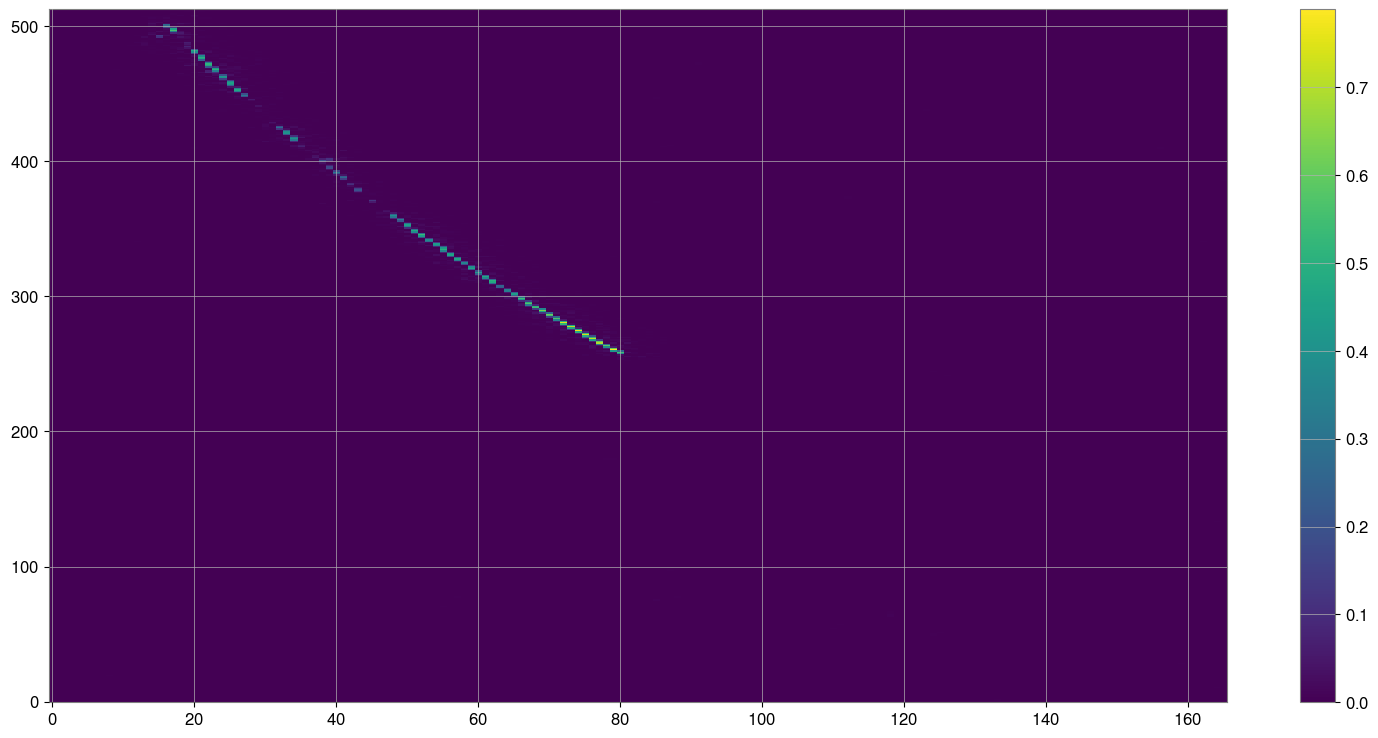

In [14]:
import numpy as np
plt.subplots(figsize=(19,9))
plt.imshow(pyxel.TFmap, aspect='auto', origin='lower', interpolation='none')
plt.colorbar()
plt.show();

In [15]:
plt.subplots(figsize=(19,9))
plt.imshow(pyxel.Glitch, aspect='auto', origin='lower', interpolation='none')
plt.colorbar()
plt.show();